In [3]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Convolutional import Convolutional
from Reshape import Reshape
from Activations import ReLu, Sigmoid, Softmax
from Losses import binary_cross_entropy, binary_cross_entropy_prime
from Network import train, predict
from Layer import Layer

def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 2, 1)
    return x, y

def preprocess_data_all_digits(x, y, limit):
    all_indices = np.random.permutation(len(x))[:limit]
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 10, 1)
    return x, y

# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 60000)
x_test, y_test = preprocess_data(x_test, y_test, 1000)

network = [
    Convolutional((1, 28, 28), 3, 10),
    Sigmoid(),
    Reshape((10, 26, 26), (10 * 26 * 26, 1)),
    Dense(10 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 2),
    Sigmoid()
]




In [4]:
# train
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=10,
    learning_rate=0.01,
    batch_size=1
)

/Users/mattia/Desktop/Neural_Nets/Activations.py:75: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


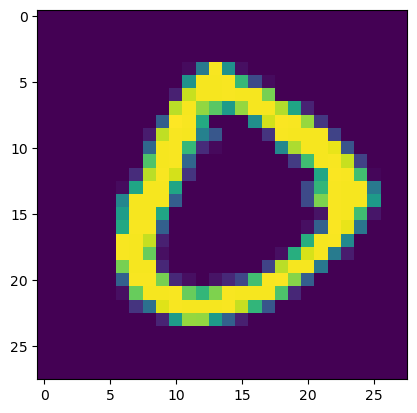

[[2.96019496e-07]
 [4.61427466e-01]]


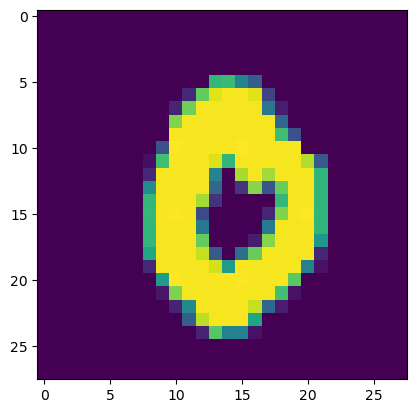

[[2.07148830e-07]
 [9.15148757e-02]]


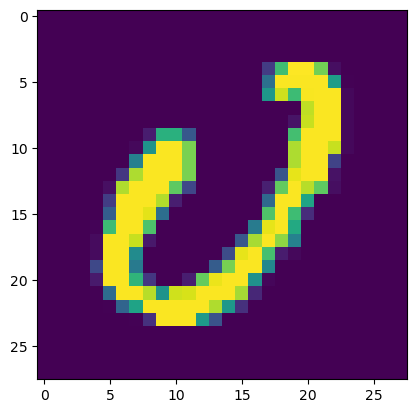

[[6.96847142e-08]
 [9.30586814e-01]]


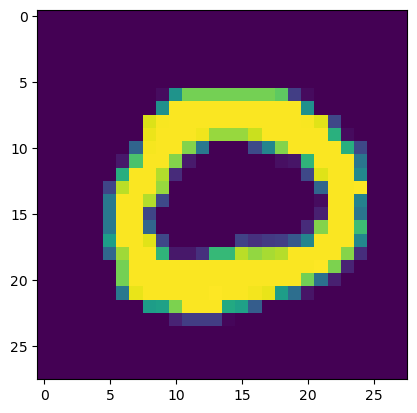

[[8.22105651e-08]
 [5.85125598e-02]]


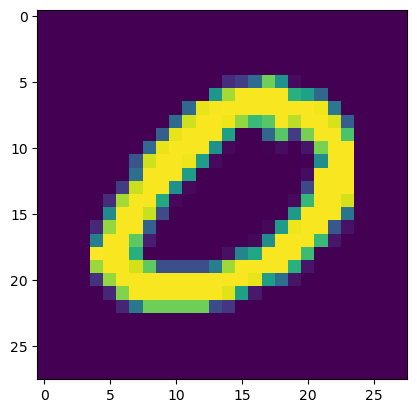

[[2.71603192e-08]
 [2.97441989e-01]]


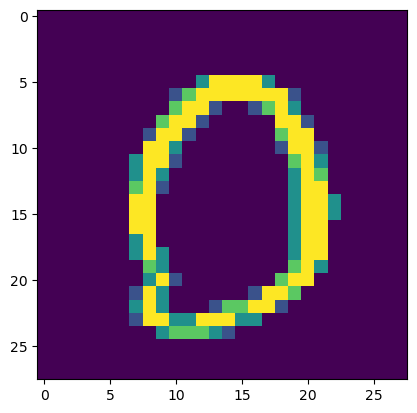

[[4.57032032e-08]
 [4.71646230e-01]]


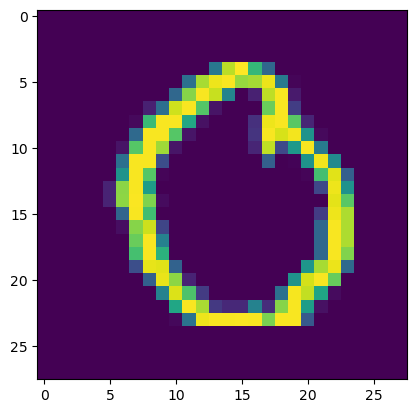

[[7.73229272e-08]
 [1.34462637e-02]]


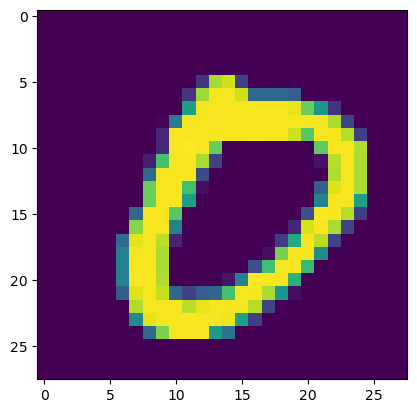

[[3.25123086e-07]
 [3.05631536e-02]]


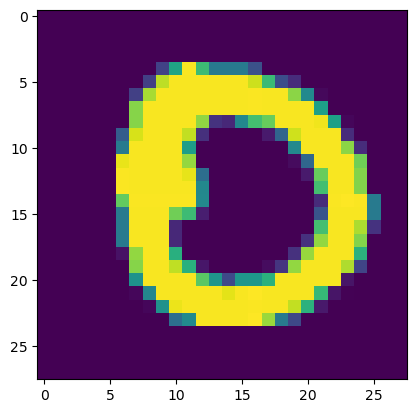

[[1.62265790e-06]
 [3.04797052e-01]]


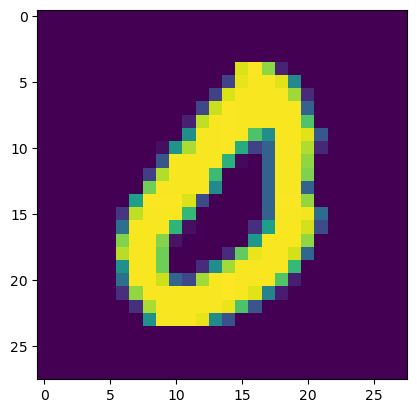

[[1.34986455e-08]
 [4.62313257e-01]]


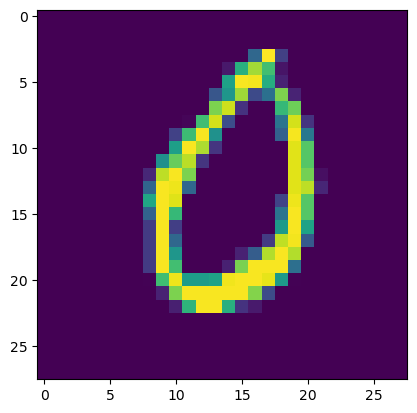

[[2.77038153e-07]
 [1.14996458e-01]]


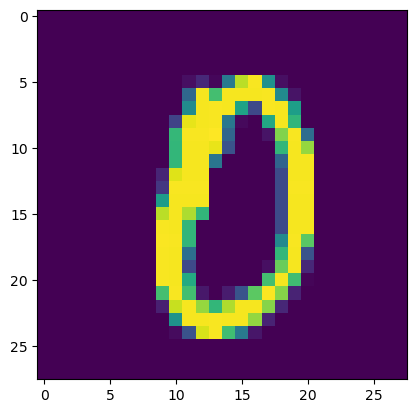

[[6.75393760e-07]
 [2.65615644e-02]]


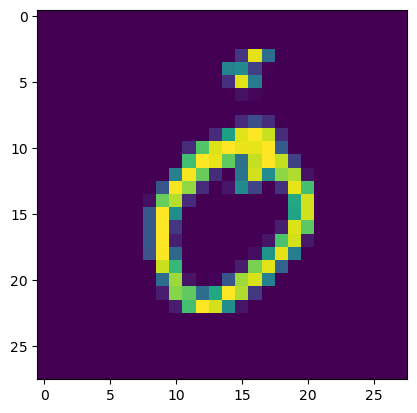

[[3.15083073e-07]
 [2.43362847e-02]]


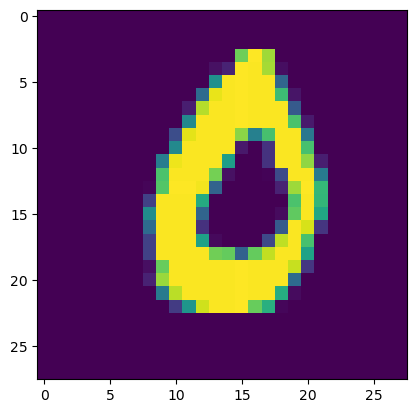

[[1.45000173e-06]
 [5.20819589e-01]]


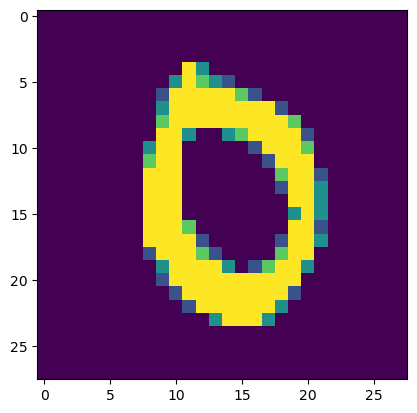

[[3.38000025e-08]
 [1.38374220e-01]]


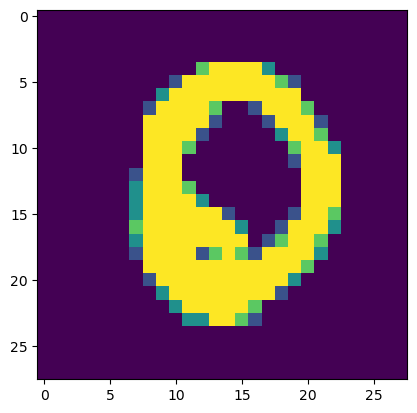

[[3.79228327e-08]
 [5.74844748e-01]]


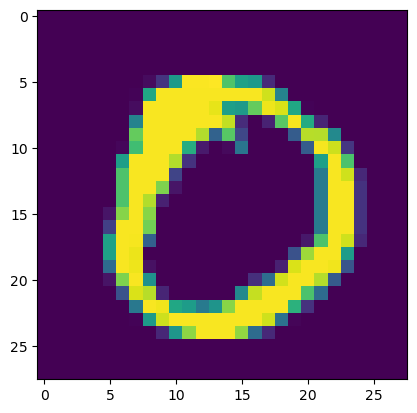

[[2.28349532e-07]
 [1.67100894e-02]]


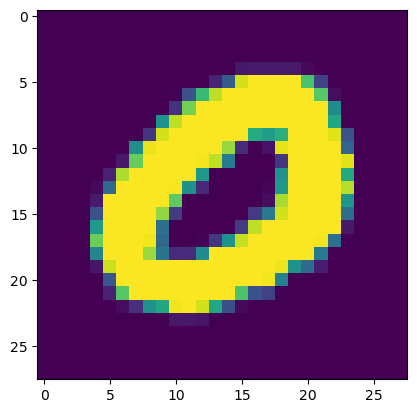

[[1.29175707e-07]
 [3.62180194e-01]]


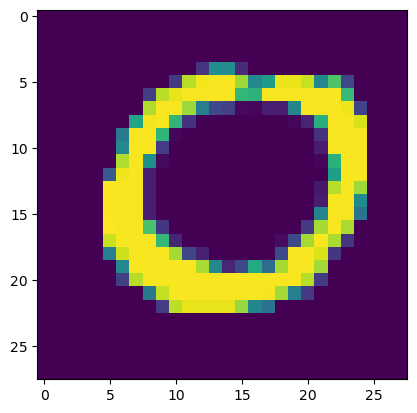

[[1.32481375e-05]
 [2.04659974e-02]]


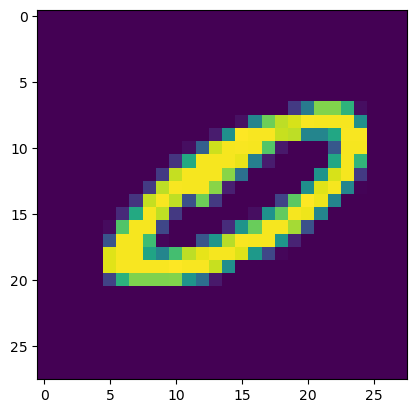

[[9.67670712e-08]
 [1.15539867e-02]]


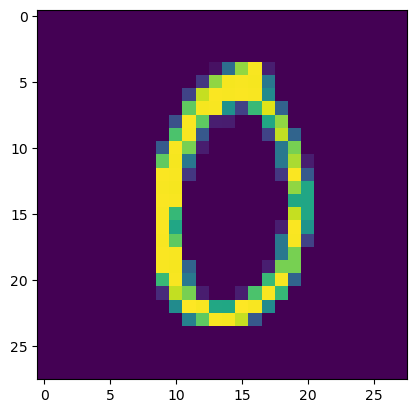

[[3.34295932e-07]
 [1.36446093e-01]]


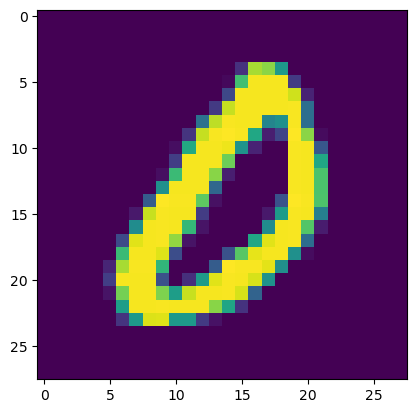

[[1.81262790e-08]
 [4.55574479e-01]]


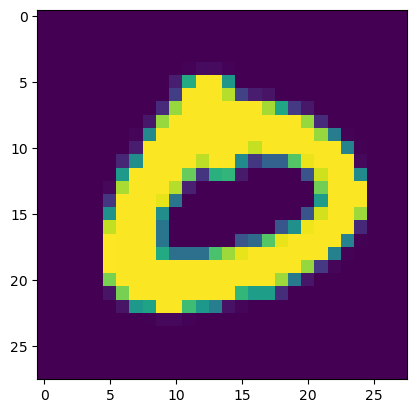

[[5.45711195e-07]
 [3.98790104e-03]]


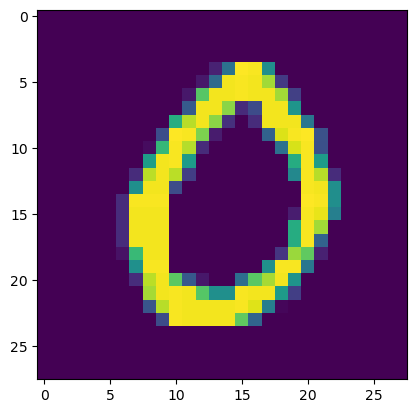

[[1.23014048e-06]
 [5.74918401e-01]]


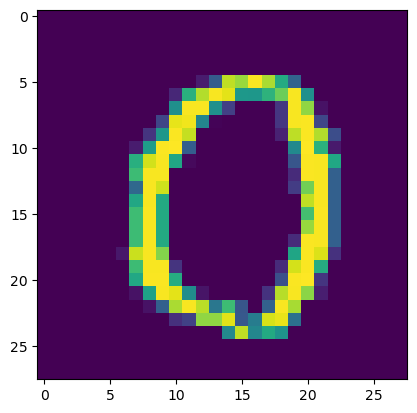

[[5.60810834e-07]
 [5.20901205e-02]]


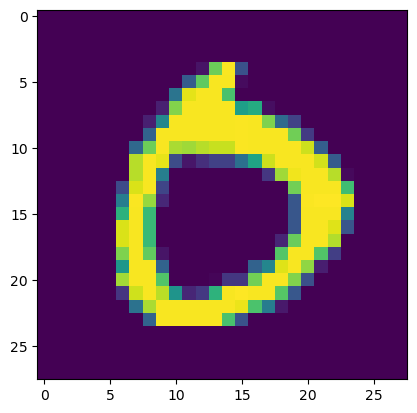

[[1.59889962e-06]
 [3.08158840e-04]]


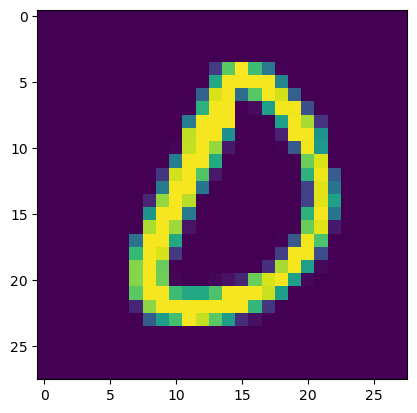

[[1.41824727e-07]
 [1.64105964e-01]]


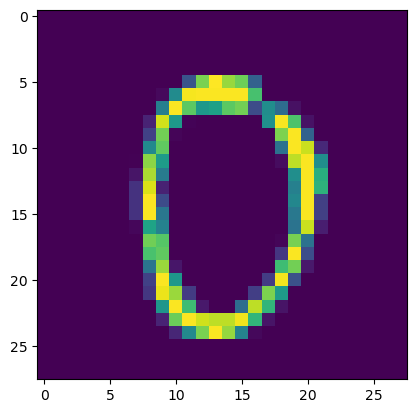

[[1.43472867e-07]
 [4.21137156e-02]]


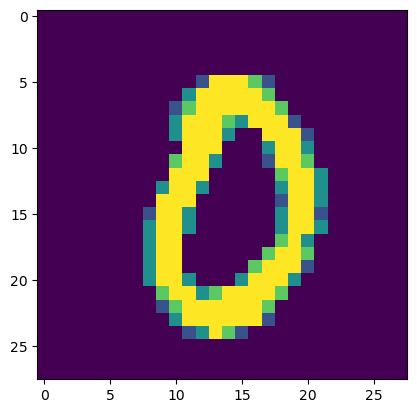

[[3.25531004e-07]
 [7.96305833e-03]]


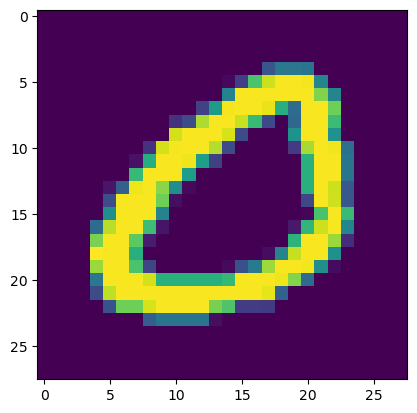

[[7.23657305e-08]
 [5.39734506e-01]]


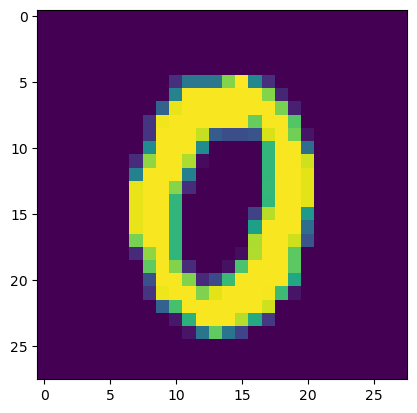

[[1.45763915e-07]
 [1.10471699e-01]]


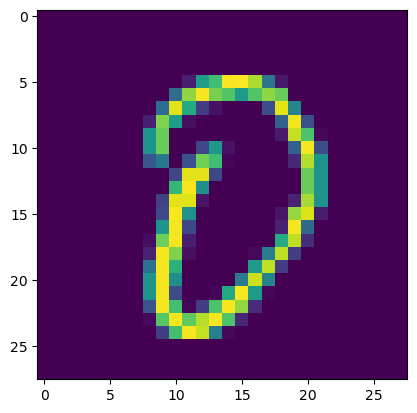

[[1.71061052e-07]
 [1.30669963e-01]]


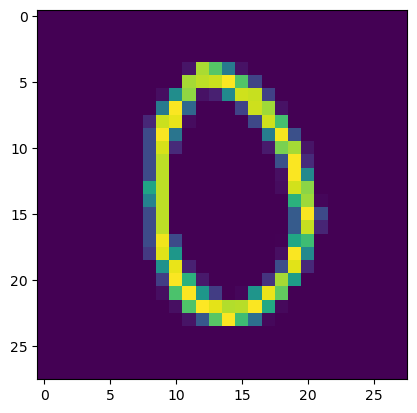

[[1.41628412e-07]
 [2.08186649e-01]]


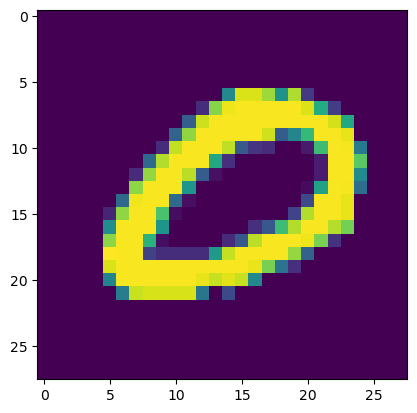

[[5.88647310e-08]
 [2.77198765e-02]]


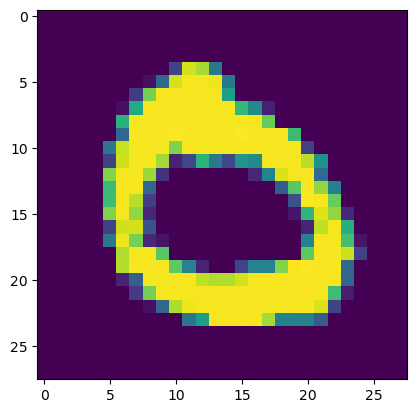

[[5.92573255e-08]
 [9.43605054e-05]]


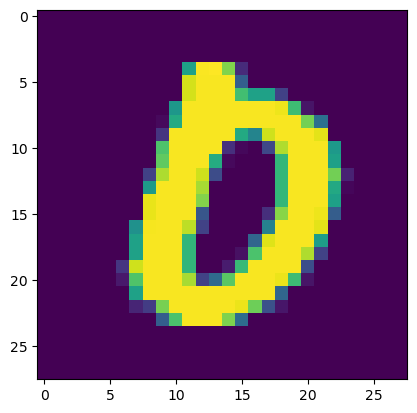

[[3.81925133e-07]
 [5.33267420e-01]]


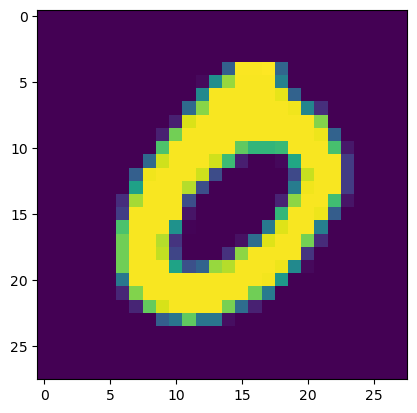

[[6.00657484e-07]
 [4.12010700e-01]]


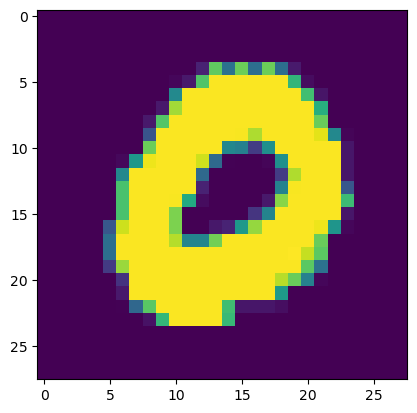

[[1.26579795e-06]
 [1.03139214e-01]]


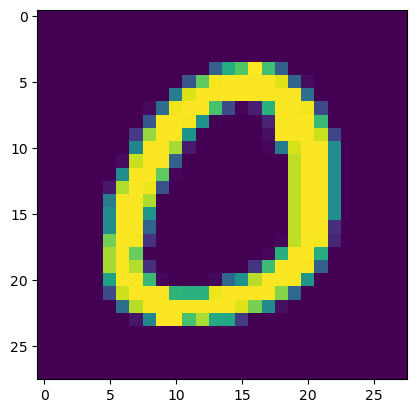

[[3.76898179e-07]
 [2.82969286e-01]]


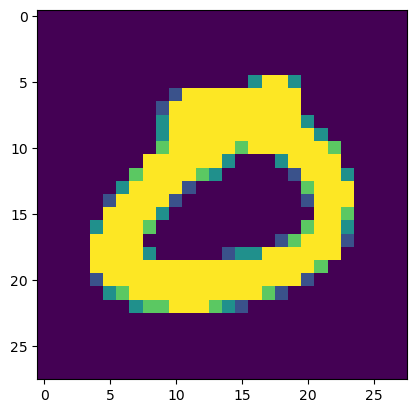

[[1.60888825e-07]
 [2.42513554e-01]]


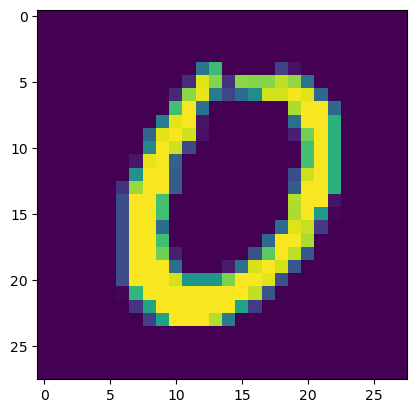

[[2.31132968e-08]
 [3.37040645e-01]]


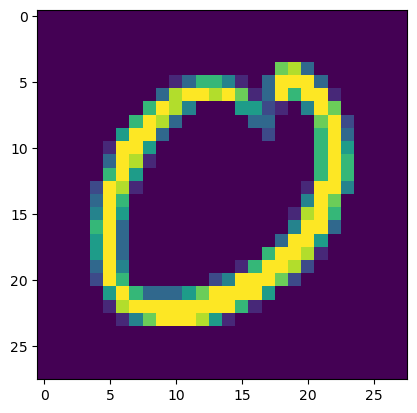

[[3.14434440e-07]
 [1.06120666e-01]]


KeyboardInterrupt: 

In [2]:
# test, keep track of correct predictions
correct = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    if np.argmax(output) == np.argmax(y):
        correct += 1
    else:
        #Plot the image
        plt.imshow(x.reshape(28, 28))
        plt.show()
        print(output)

# print the accuracy
print(f"{correct / len(x_test) * 100}% of test data correctly predicted")
